regression

In [1]:
# from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost as xgb
import numpy as np
import shap


/home/yishai/anaconda3/envs/tf_39/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Code snippet from SHAP github page

# train an XGBoost model

from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True,as_frame=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

model = xgb.XGBRegressor(objective = "reg:squarederror", n_estimators=1000, max_depth=10, learning_rate=0.01,
                                )

# Fit the model to the training data
model.fit(X_train, y_train)




pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [3]:
y_val_pred = model.predict(X_val)
predictions = [round(value) for value in y_val_pred]
accuracy = accuracy_score(y_val, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 98.15%


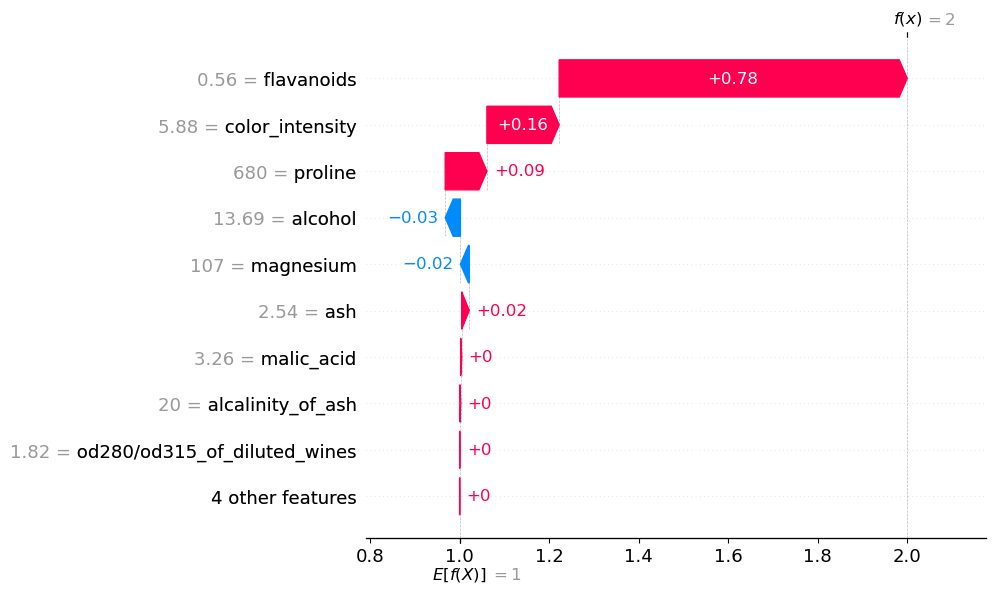

In [6]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_val)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

shap.plots.force(shap_values[0])

# XGBoost SHAP waterfall implementation,

To create an XGBoost SHAP waterfall implementation:

Train an XGBoost model on your data.

Use the "shap.Explainer" function to create a SHAP explainer object. This will allow you to compute SHAP values for your model predictions.

Use the "explainer.shap_values" method to compute the SHAP values for each prediction in your dataset.

Plot the SHAP values as a waterfall chart using a library such as Plotly or Matplotlib.

Interactively explore the waterfall chart to understand the contribution of each feature to the model's predictions.

shap_values.data == x sample



pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


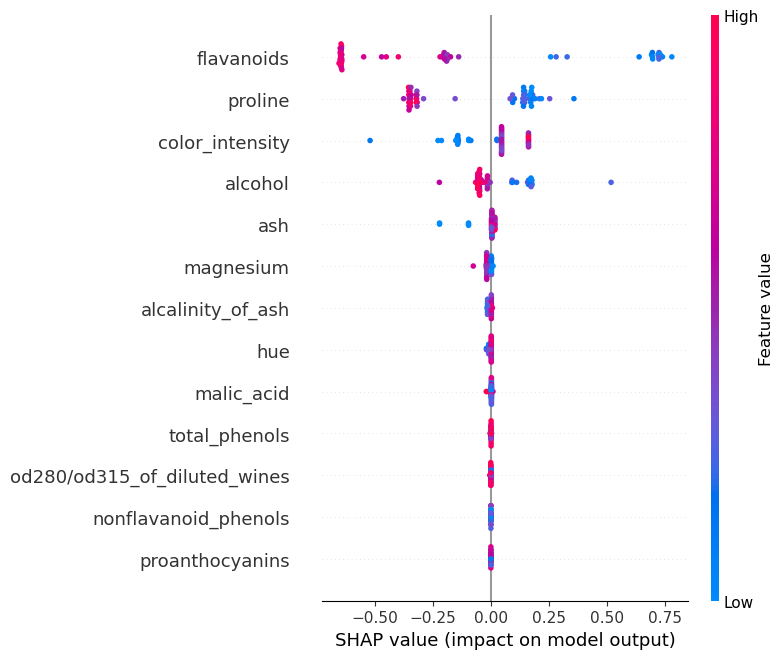

In [5]:
tree_explainer = shap.TreeExplainer(model)
shap_values_tree = tree_explainer.shap_values(X_val)
shap.summary_plot(shap_values_tree, X_val)